<a href="https://colab.research.google.com/github/MoneerahAlboulayan/info5731/blob/master/Alboulayan_selfstudy3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Chapter9
import sys, re

In [0]:
regex = sys.argv[1]

In [0]:
for line in sys.stdin:
  if re.search(regex, line):
    sys.stdout.write(line)

In [0]:
import sys

In [0]:
count = 0
for line in sys.stdin:
  count += 1

In [0]:
print (count)

0


In [0]:
import sys
from collections import Counter

In [0]:
try:
  num_words = int(sys.argv[1])
except:
  print ("usage: most_common_words.py num_words")
  sys.exit(1) # non-zero exit code indicates error

counter = Counter(word.lower() # lowercase words
  for line in sys.stdin #
  for word in line.strip().split() # split on spaces
  if word) # skip empty 'words'

for word, count in counter.most_common(num_words):
  sys.stdout.write(str(count))
  sys.stdout.write("\t")
  sys.stdout.write(word)
  sys.stdout.write("\n")
  

usage: most_common_words.py num_words


SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [0]:
file_for_writing = open('writing_file.txt', 'w')

In [0]:
file_for_appending = open('appending_file.txt', 'a')

In [0]:
file_for_writing.close()

In [0]:
today_prices = { 'AAPL' : 90.91, 'MSFT' : 41.68, 'FB' : 64.5 }

In [0]:
with open('comma_delimited_stock_prices.txt','wb') as f:
  writer = csv.writer(f, delimiter=',')
  for stock, price in today_prices.items():
    writer.writerow([stock, price])

TypeError: ignored

In [0]:
results = [["test1", "success", "Monday"],
["test2", "success, kind of", "Tuesday"],
["test3", "failure, kind of", "Wednesday"],
["test4", "failure, utter", "Thursday"]]

In [0]:
with open('bad_csv.txt', 'w') as f:
  for row in results:
    f.write(",".join(map(str, row))) 
    f.write("\n") 

In [0]:
open('bad_csv.txt', 'w')

<_io.TextIOWrapper name='bad_csv.txt' mode='w' encoding='UTF-8'>

In [0]:
from bs4 import BeautifulSoup
import requests
html = requests.get("http://www.example.com").text
soup = BeautifulSoup(html, 'html5lib')

In [0]:
first_paragraph = soup.find('p')

In [0]:
first_paragraph_text = soup.p.text
first_paragraph_words = soup.p.text.split()

In [0]:
all_paragraphs = soup.find_all('p') # or just soup('p')
paragraphs_with_ids = [p for p in soup('p') if p.get('id')]

In [0]:
important_paragraphs = soup('p', {'class' : 'important'})
important_paragraphs2 = soup('p', 'important')
important_paragraphs3 = [p for p in soup('p')
  if 'important' in p.get('class', [])]

In [0]:
spans_inside_divs = [span
  for div in soup('div') # for each <div> on the page
  for span in div('span')]

In [0]:
url = "http://shop.oreilly.com/category/browse-subjects/" + \
"data.do?sortby=publicationDate&page=1"
soup = BeautifulSoup(requests.get(url).text, 'html5lib')

In [0]:
tds = soup('td', 'thumbtext')
print (len(tds))
     

0


In [0]:
def book_info(td):
  """given a BeautifulSoup <td> Tag representing a book,
  extract the book's details and return a dict"""
  title = td.find("div", "thumbheader").a.text
  by_author = td.find('div', 'AuthorName').text
  authors = [x.strip() for x in re.sub("^By ", "", by_author).split(",")]
  isbn_link = td.find("div", "thumbheader").a.get("href")
  isbn = re.match("/product/(.*)\.do", isbn_link).groups()[0]
  date = td.find("span", "directorydate").text.strip()
  return {
    "title" : title,
    "authors" : authors,
    "isbn" : isbn,
    "date" : date
}

In [0]:
from bs4 import BeautifulSoup
import requests
from time import sleep
base_url = "http://shop.oreilly.com/category/browse-subjects/" + \
"data.do?sortby=publicationDate&page="
books = []
NUM_PAGES = 31
for page_num in range(1, NUM_PAGES + 1):
  print ("souping page"), page_num, ",", len(books), " found so far"
  url = base_url + str(page_num)
  soup = BeautifulSoup(requests.get(url).text, 'html5lib')
  for td in soup('td', 'thumbtext'):
    if not is_video(td):
      books.append(book_info(td))
  sleep(30)

souping page
souping page
souping page
souping page
souping page
souping page
souping page
souping page
souping page
souping page
souping page
souping page
souping page
souping page
souping page
souping page
souping page
souping page


KeyboardInterrupt: ignored

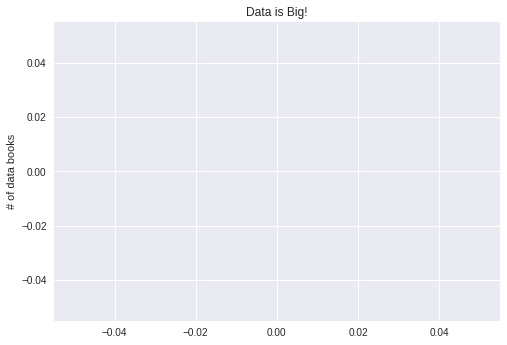

In [0]:
def get_year(book):
  """book["date"] looks like 'November 2014' so we need to
  split on the space and then take the second piece"""
  return int(book["date"].split()[1])

year_counts = Counter(get_year(book) for book in books
  if get_year(book) <= 2014)

import matplotlib.pyplot as plt
years = sorted(year_counts)
book_counts = [year_counts[year] for year in years]
plt.plot(years, book_counts)
plt.ylabel("# of data books")
plt.title("Data is Big!")
plt.show()

In [0]:
import json
serialized = """{ "title" : "Data Science Book",
  "author" : "Joel Grus",
  "publicationYear" : 2014,
  "topics" : [ "data", "science", "data science"] }"""
  
deserialized = json.loads(serialized)
if "data science" in deserialized["topics"]:
  print (deserialized)

{'title': 'Data Science Book', 'author': 'Joel Grus', 'publicationYear': 2014, 'topics': ['data', 'science', 'data science']}


In [0]:
import requests, json
endpoint = "https://api.github.com/users/joelgrus/repos"
repos = json.loads(requests.get(endpoint).text)

In [0]:
!pip install python-dateutil
from dateutil.parser import parse
dates = [parse(repo["created_at"]) for repo in repos]
month_counts = Counter(date.month for date in dates)
weekday_counts = Counter(date.weekday() for date in dates)

In [0]:
last_5_repositories = sorted(repos,
  key=lambda r: r["created_at"],
  reverse=True)[:5]

In [0]:
last_5_languages = [repo["language"]
  for repo in last_5_repositories]

In [0]:
from twython import Twython
twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET)

In [0]:
for status in twitter.search(q='"data science"')["statuses"]:
  user = status["user"]["screen_name"].encode('utf-8')
  text = status["text"].encode('utf-8')
  print (user, ":", text)
  print

In [0]:
from twython import TwythonStreamer
tweets = []
class MyStreamer(TwythonStreamer):
  """our own subclass of TwythonStreamer that specifies
  how to interact with the stream"""
  
  def on_success(self, data):
    """what do we do when twitter sends us data?
    here data will be a Python dict representing a tweet"""
    
    if data['lang'] == 'en':
      tweets.append(data)
      print ("received tweet #"), len(tweets)
      
    if len(tweets) >= 1000:
      self.disconnect() 
      
  def on_error(self, status_code, data):
    print (status_code, data)
    self.disconnect()

In [0]:
stream = MyStreamer(CONSUMER_KEY, CONSUMER_SECRET,
ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
stream.statuses.filter(track='data')

In [0]:
top_hashtags = Counter(hashtag['text'].lower()
  for tweet in tweets
  for hashtag in tweet["entities"]["hashtags"])
print (top_hashtags.most_common(5))

In [0]:
#Chapter23

In [0]:
users = [[0, "Hero", 0],
  [1, "Dunn", 2],
  [2, "Sue", 3],
  [3, "Chi", 3]]

In [0]:
class Table:
  def __init__(self, columns):
    self.columns = columns
    self.rows = []
    
  def __repr__(self):
    """pretty representation of the table: columns then rows"""
    return str(self.columns) + "\n" + "\n".join(map(str, self.rows))
  
  def insert(self, row_values):
    if len(row_values) != len(self.columns):
      raise TypeError("wrong number of elements")
    row_dict = dict(zip(self.columns, row_values))
    self.rows.append(row_dict)

In [0]:
users = Table(["user_id", "name", "num_friends"])
users.insert([0, "Hero", 0])
users.insert([1, "Dunn", 2])
users.insert([2, "Sue", 3])
users.insert([3, "Chi", 3])
users.insert([4, "Thor", 3])
users.insert([5, "Clive", 2])
users.insert([6, "Hicks", 3])
users.insert([7, "Devin", 2])
users.insert([8, "Kate", 2])
users.insert([9, "Klein", 3])
users.insert([10, "Jen", 1])

In [0]:
print (users)

['user_id', 'name', 'num_friends']
{'user_id': 0, 'name': 'Hero', 'num_friends': 0}
{'user_id': 1, 'name': 'Dunn', 'num_friends': 2}
{'user_id': 2, 'name': 'Sue', 'num_friends': 3}
{'user_id': 3, 'name': 'Chi', 'num_friends': 3}
{'user_id': 4, 'name': 'Thor', 'num_friends': 3}
{'user_id': 5, 'name': 'Clive', 'num_friends': 2}
{'user_id': 6, 'name': 'Hicks', 'num_friends': 3}
{'user_id': 7, 'name': 'Devin', 'num_friends': 2}
{'user_id': 8, 'name': 'Kate', 'num_friends': 2}
{'user_id': 9, 'name': 'Klein', 'num_friends': 3}
{'user_id': 10, 'name': 'Jen', 'num_friends': 1}


In [0]:
def update(self, updates, predicate):
  for row in self.rows:
    if predicate(row):
      for column, new_value in updates.iteritems():
        row[column] = new_value


In [0]:
def delete(self, predicate=lambda row: True):
  """delete all rows matching predicate
  or all rows if no predicate supplied"""
  self.rows = [row for row in self.rows if not(predicate(row))]

In [0]:
def select(self, keep_columns=None, additional_columns=None):
  if keep_columns is None: 
    keep_columns = self.columns 
  if additional_columns is None:
    additional_columns = {}

  result_table = Table(keep_columns + additional_columns.keys())
  
  for row in self.rows:
    new_row = [row[column] for column in keep_columns]
    for column_name, calculation in additional_columns.iteritems():
      new_row.append(calculation(row))
  result_table.insert(new_row)
  return result_table

In [0]:
def where(self, predicate=lambda row: True):
  """return only the rows that satisfy the supplied predicate"""
  where_table = Table(self.columns)
  where_table.rows = filter(predicate, self.rows)
  return where_table

def limit(self, num_rows):
  """return only the first num_rows rows"""
  limit_table = Table(self.columns)
  limit_table.rows = self.rows[:num_rows]
  return limit_table

In [0]:
def group_by(self, group_by_columns, aggregates, having=None):
  grouped_rows = defaultdict(list)

  # populate groups
  for row in self.rows:
    key = tuple(row[column] for column in group_by_columns)
    grouped_rows[key].append(row)

    # result table consists of group_by columns and aggregates
  result_table = Table(group_by_columns + aggregates.keys())

  for key, rows in grouped_rows.iteritems():
    if having is None or having(rows):
      new_row = list(key)
      for aggregate_name, aggregate_fn in aggregates.iteritems():
        new_row.append(aggregate_fn(rows))
      result_table.insert(new_row)
  
  return result_table


In [0]:
def first_letter_of_name(row):
  return row["name"][0] if row["name"] else ""

In [0]:
def average_num_friends(rows):
  return sum(row["num_friends"] for row in rows) / len(rows)

In [0]:
def enough_friends(rows):
  return average_num_friends(rows) > 1

In [0]:
def order_by(self, order):
  new_table = self.select() # make a copy
  new_table.rows.sort(key=order)
  return new_table

In [0]:
user_interests = Table(["user_id", "interest"])
user_interests.insert([0, "SQL"])
user_interests.insert([0, "NoSQL"])
user_interests.insert([2, "SQL"])
user_interests.insert([2, "MySQL"])

In [0]:
def join(self, other_table, left_join=False):
  join_on_columns = [c for c in self.columns # columns in
    if c in other_table.columns] # both tables
 
  additional_columns = [c for c in other_table.columns # columns only
    if c not in join_on_columns] # in right table

  # all columns from left table + additional_columns from right table
  join_table = Table(self.columns + additional_columns)

  for row in self.rows:
    def is_join(other_row):
      return all(other_row[c] == row[c] for c in join_on_columns)

    other_rows = other_table.where(is_join).rows

    # each other row that matches this one produces a result row
    for other_row in other_rows:
      join_table.insert([row[c] for c in self.columns] +
        [other_row[c] for c in additional_columns])

    # if no rows match and it's a left join, output with Nones
    if left_join and not other_rows:
      join_table.insert([row[c] for c in self.columns] +
                        [None for c in additional_columns])
  return join_table

In [0]:
def count_interests(rows):
  """counts how many rows have non-None interests"""
  return len([row for row in rows if row["interest"] is not None])

In [0]:
! pip install requests_html

    100% |████████████████████████████████| 1.2MB 13.3MB/s 
    100% |████████████████████████████████| 71kB 23.3MB/s 
  Stored in directory: /root/.cache/pip/wheels/11/ef/7a/b4e5692572b93ce67bb9d0680bc8e840ff9a21fab73a3bff56
  Stored in directory: /root/.cache/pip/wheels/34/e0/5d/070e22eceecf7ecd5fa4b86bbc18c1c7d0b90e02e9b57f35eb
  Stored in directory: /root/.cache/pip/wheels/5e/63/09/d1dc15179f175357d3f5c00cbffbac37f9e8690d80545143ff
Successfully built parse pyppeteer fake-useragent


In [0]:
from requests_html import HTMLSession

In [0]:
url = 'https://www.cleveland.com/metro/index.ssf/2017/12/case_western_reserve_university_president_barbara_snyders_base_salary_and_bonus_pay_tops_among_private_colleges_in_ohio.html'

In [0]:
r = HTMLSession().get(url)

In [0]:
print(r.html.raw_html)

b'<!doctype html>\n<!--[if lt IE 7]> <html class="no-js lt-ie10 lt-ie9 lt-ie8 lt-ie7" lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#"> <![endif]-->\n<!--[if IE 7]>    <html class="no-js lt-ie10 lt-ie9 lt-ie8" lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#"> <![endif]-->\n<!--[if IE 8]>    <html class="no-js lt-ie10 lt-ie9" lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#"> <![endif]-->\n<!--[if IE 9]>    <html class="no-js lt-ie10" lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#"> <![endif]-->\n\n<!--[if gt IE 9]><!--> <html class="no-js" lang="en-US" dir="ltr" prefix="fb: http://www.facebook.com/2008/fbml og: http://ogp.me/ns#"> <!--<![endif]-->\n\n\t<head>\n\t\t\n\t\t\t\n\t\t\n\t\t\n\t\t\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\t\t\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />\n\t\t